<a href="https://colab.research.google.com/github/Malbasahi/Analyzing_HR_Employee_Attrition/blob/main/HR_Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Load the dataset
df = pd.read_csv('HR-Employee-Attrition.csv')

In [87]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [88]:
df.head

<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [89]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [90]:
# Data Cleaning
# Deleting redundant columns
redundant_columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=redundant_columns)

In [91]:
# Renaming the columns (you can adjust column names as needed)
column_mapping = {
    'BusinessTravel': 'TravelFrequency',
    'JobRole': 'Role',
    'MaritalStatus': 'Marital',
    'NumCompaniesWorked': 'NumCompanies',
    'DistanceFromHome': 'Distance'
}
df = df.rename(columns=column_mapping)

In [92]:
# Dropping duplicates
df = df.drop_duplicates()

In [93]:
# Cleaning individual columns

# Clean 'Gender' column (e.g., standardize to uppercase)
df['Gender'] = df['Gender'].str.upper()

# Clean 'Marital' column (e.g., standardize to title case)
df['Marital'] = df['Marital'].str.title()

# Clean 'EducationField' column (e.g., remove leading/trailing whitespaces)
df['EducationField'] = df['EducationField'].str.strip()

# Clean 'Department' column (e.g., convert to uppercase)
df['Department'] = df['Department'].str.upper()

# Clean 'BusinessTravel' column (e.g., standardize categories)
df['TravelFrequency'] = df['TravelFrequency'].str.replace('Travel_', '').str.title()

# Clean 'Role' column (e.g., remove leading/trailing whitespaces)
df['Role'] = df['Role'].str.strip()

In [94]:
# Remove NaN values
df = df.dropna()

In [95]:
# List all column names to verify the exact name
print(df.columns)

Index(['Age', 'Attrition', 'TravelFrequency', 'DailyRate', 'Department',
       'Distance', 'Education', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'Role',
       'JobSatisfaction', 'Marital', 'MonthlyIncome', 'MonthlyRate',
       'NumCompanies', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


<ipython-input-96-76ee1a1f9111>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


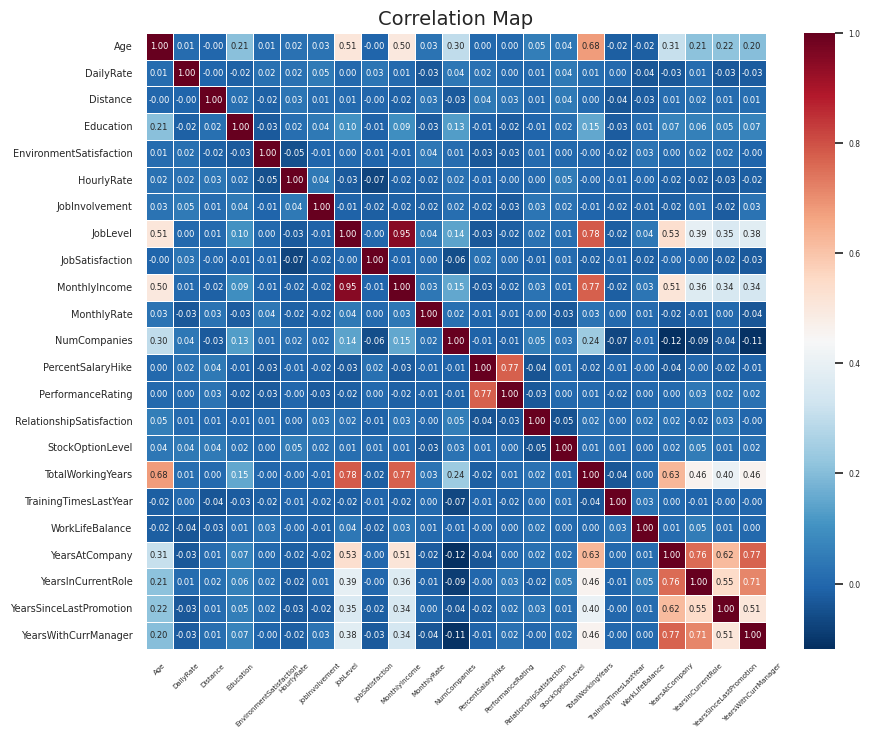

In [96]:
corr_matrix = df.corr()
# Plot a correlation map for all numeric variables with smaller labels and values
plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.set(font_scale=0.5)  # Reduce font size for labels and values

# Use a more distinct color map (e.g., 'RdBu_r' for red-blue)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', linewidths=0.5)

plt.title('Correlation Map', fontsize=14)  # Adjust the title font size
plt.xticks(rotation=45, fontsize=5)  # Rotate x-axis labels and set font size
plt.yticks(rotation=0, fontsize=7)  # Rotate y-axis labels and set font size
plt.show()

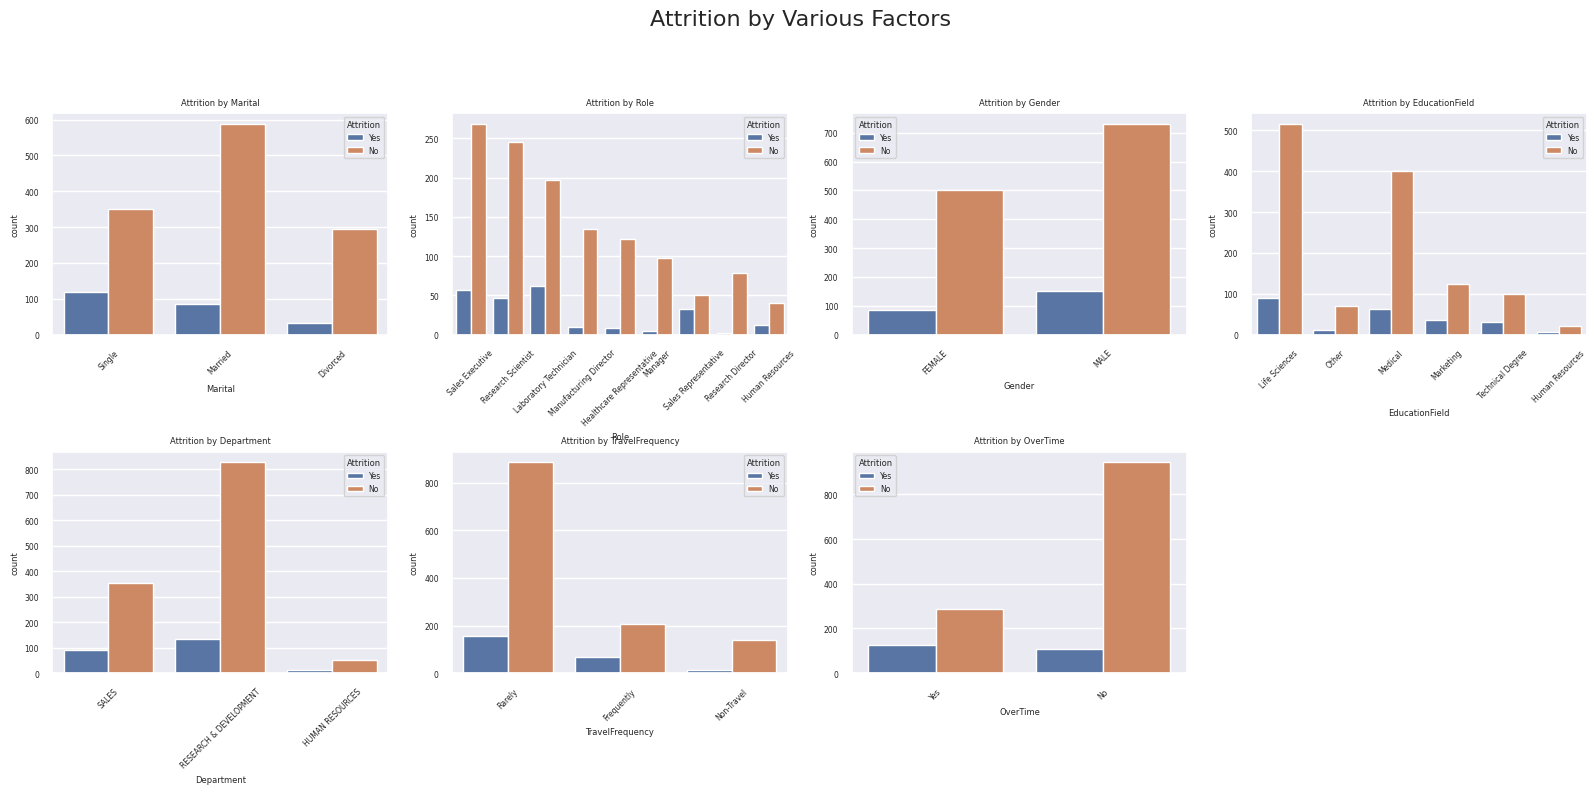

In [97]:
# Define the columns to visualize
cols_to_visualize = ['Marital', 'Role', 'Gender', 'EducationField', 'Department', 'TravelFrequency', 'OverTime']

# Create subplots in a grid layout
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Attrition by Various Factors', fontsize=16)

# Flatten the axes into a 1D array
axes = axes.ravel()

# Iterate over the columns and create countplots
for i, col in enumerate(cols_to_visualize):
    sns.countplot(data=df, x=col, hue='Attrition', ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)  # Rotate x-axis labels

# Remove any unused subplots
for i in range(len(cols_to_visualize), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

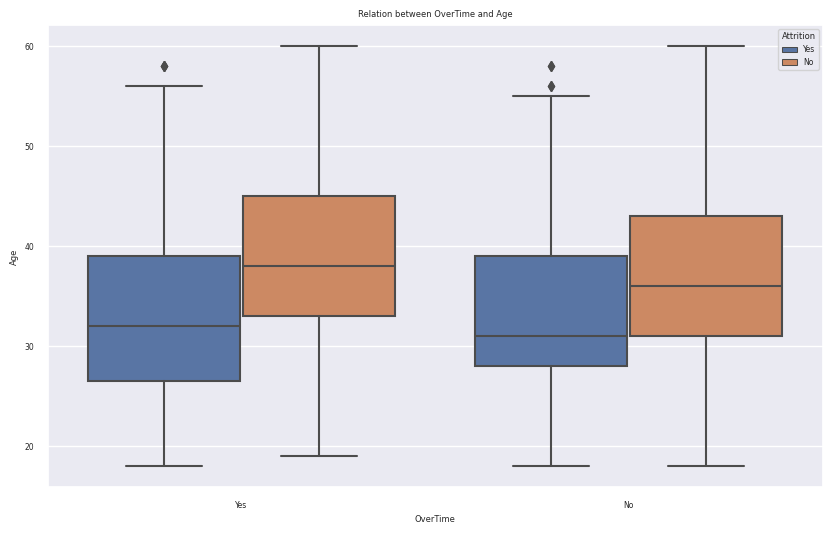

In [98]:
# Relation between Overtime and Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='OverTime', y='Age', hue='Attrition')
plt.title('Relation between OverTime and Age')
plt.show()

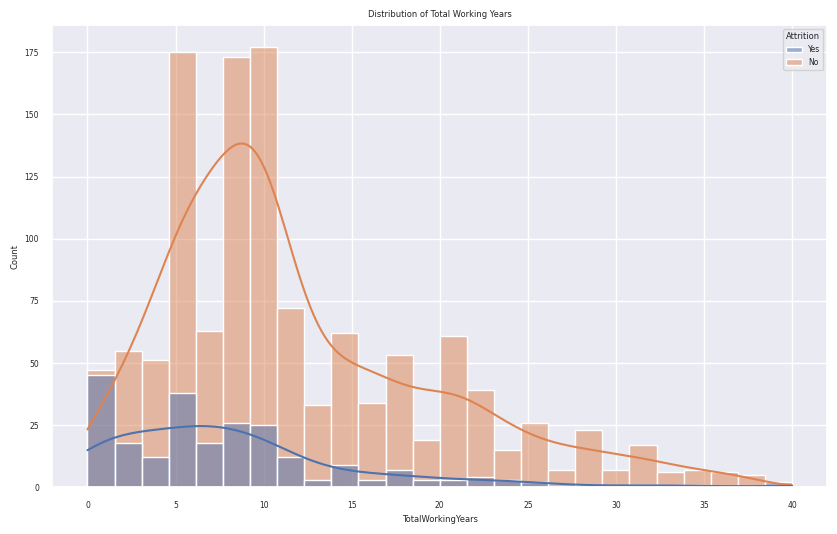

In [99]:
# Total Working Years
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalWorkingYears', hue='Attrition', kde=True)
plt.title('Distribution of Total Working Years')
plt.show()

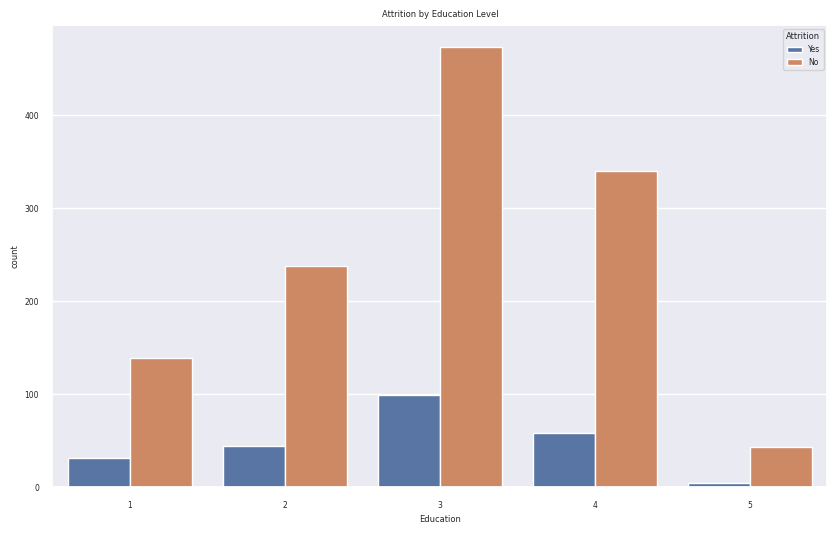

In [100]:
# Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title('Attrition by Education Level')
plt.show()

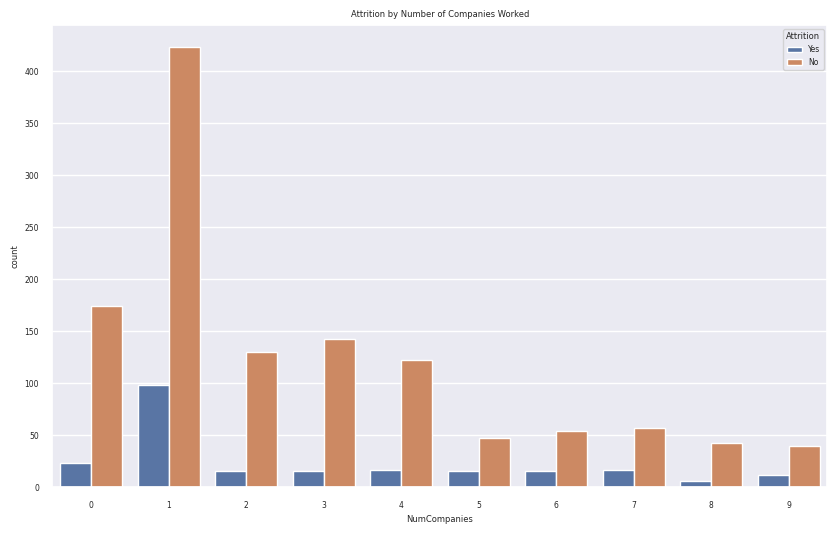

In [101]:
# Number of Companies Worked
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NumCompanies', hue='Attrition')
plt.title('Attrition by Number of Companies Worked')
plt.show()

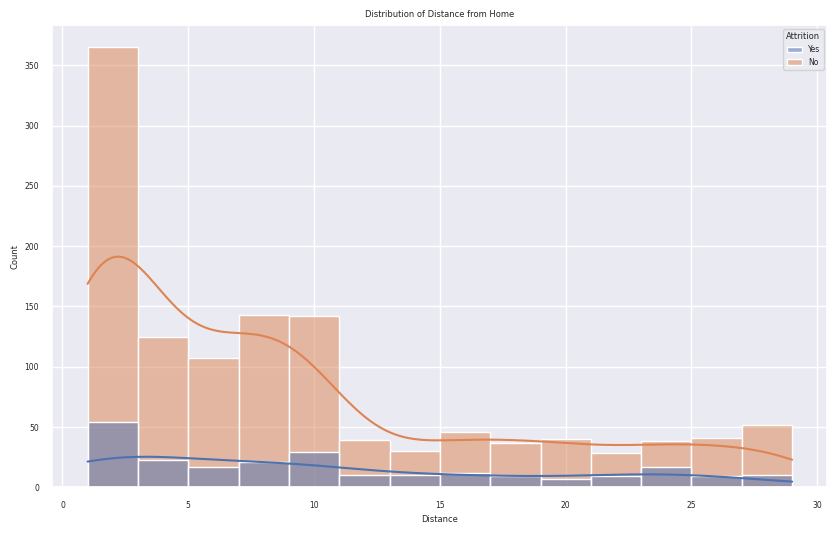

In [102]:
# Distance from Home
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Distance', hue='Attrition', kde=True)
plt.title('Distribution of Distance from Home')
plt.show()

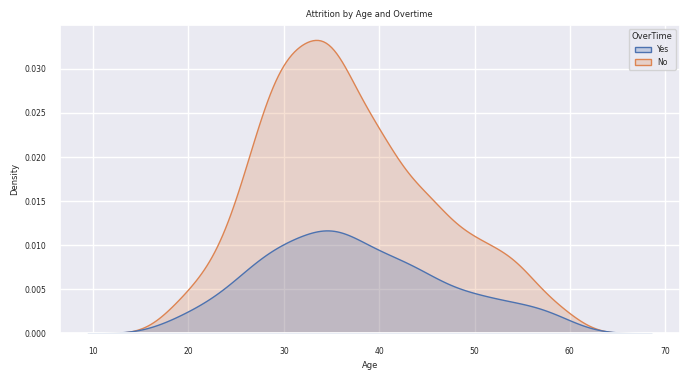

In [103]:
#Overtime Plot (KDE Plot for Age)
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df, x='Age', hue='OverTime', fill=True)
plt.title('Attrition by Age and Overtime')
plt.show()

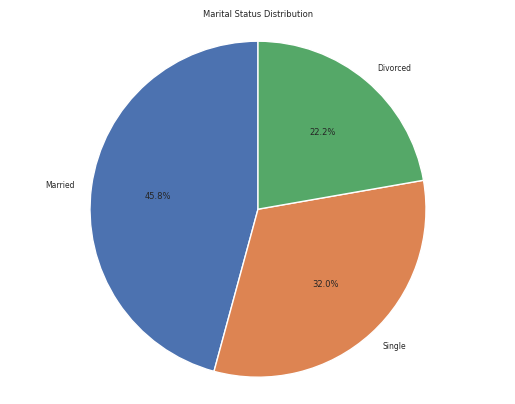

In [104]:
#Marital Status Plot (Pie Chart)
marital_counts = df['Marital'].value_counts()
labels = marital_counts.index
sizes = marital_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Marital Status Distribution')
plt.show()

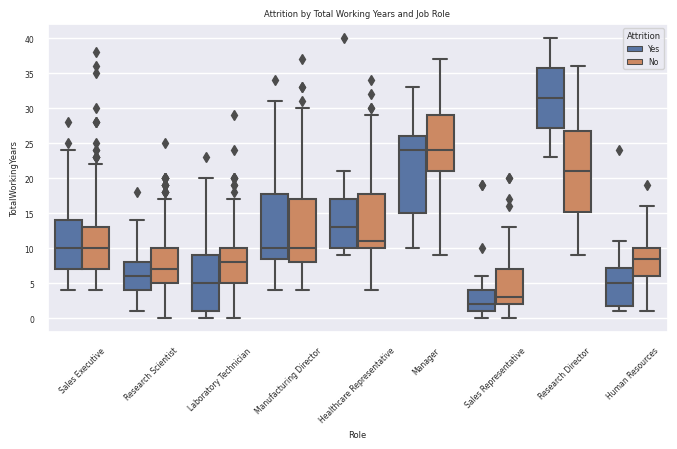

In [105]:
#Job Role Plot (Box Plot for Total Working Years)
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Role', y='TotalWorkingYears', hue='Attrition')
plt.title('Attrition by Total Working Years and Job Role')
plt.xticks(rotation=45)
plt.show()

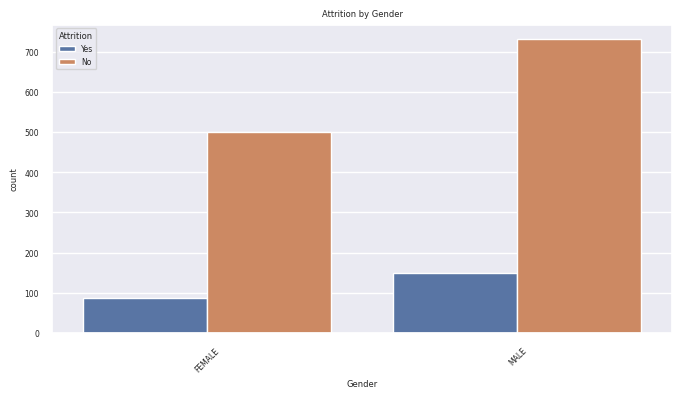

In [106]:
#Gender Plot (Count Plot)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.xticks(rotation=45)
plt.show()

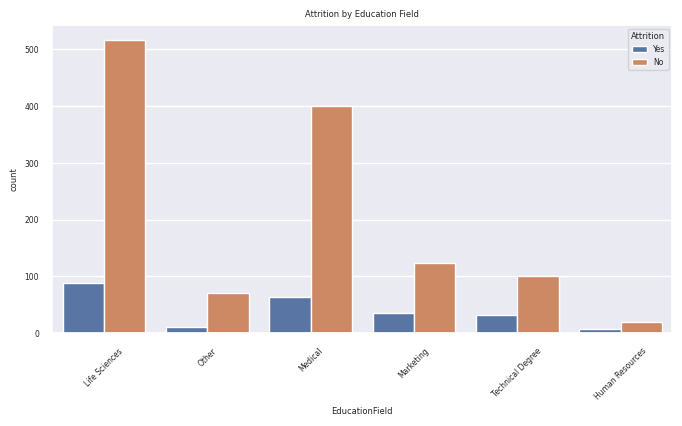

In [107]:
#Education Field Plot (Count Plot)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.title('Attrition by Education Field')
plt.xticks(rotation=45)
plt.show()

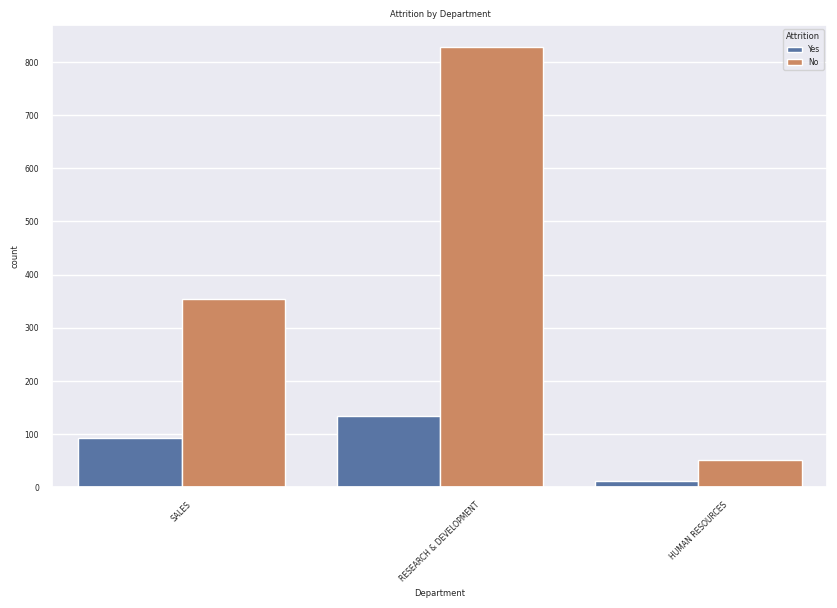

In [108]:
#Department Plot (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

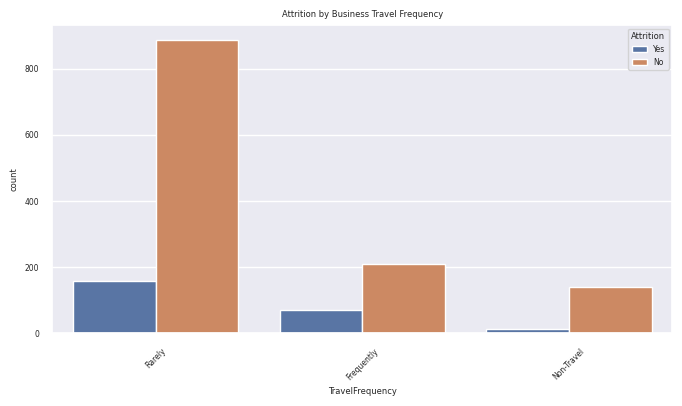

In [109]:
#Business Travel Plot (Count Plot)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='TravelFrequency', hue='Attrition')
plt.title('Attrition by Business Travel Frequency')
plt.xticks(rotation=45)
plt.show()

In [110]:
# Save the cleaned data to a file
df.to_csv('cleaned_HR_data.csv', index=False)

# Generate a link to download the file
from google.colab import files
files.download('cleaned_HR_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>